<a href="https://colab.research.google.com/github/NealWhitlock/Notebook/blob/master/Fitbit_Exploration_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is a data set consisting of my activity levels over the course of 2019 as tracked by a Fitbit. At the outset I was trying to find a connection between my activities and my resting heart rate as I noticed that my RHR varied over the course of 2019.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
# Upload the data set from computer
from google.colab import files
uploaded = files.upload()

Saving Fitbit - 2019 - Combined.csv to Fitbit - 2019 - Combined.csv


In [0]:
# Create dataframe
df = pd.read_csv('Fitbit - 2019 - Combined.csv')

In [0]:
print(df.shape)
df.head()

(365, 20)


,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Resting Heart Rate,Sleep - Start Time,Sleep - End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,1/1/2019,"4,483","13,195",6.12,33,370,277,164,64,"3,082",61,2018-12-31 10:41PM,2019-01-01 8:06AM,476.0,89.0,27.0,565.0,137.0,226.0,113.0
1,1/2/2019,"3,696","10,305",4.78,7,580,230,76,34,"2,010",61,2019-01-01 10:50PM,2019-01-02 7:31AM,451.0,69.0,21.0,520.0,89.0,273.0,89.0
2,1/3/2019,"3,745","9,323",4.33,2,534,357,53,17,"2,209",61,2019-01-02 10:33PM,2019-01-03 6:32AM,427.0,52.0,21.0,479.0,96.0,246.0,85.0
3,1/4/2019,"3,992","11,617",5.39,2,523,338,65,37,"2,532",62,2019-01-03 10:33PM,2019-01-04 6:31AM,406.0,71.0,17.0,477.0,112.0,174.0,120.0
4,1/5/2019,"3,323","6,714",3.12,2,537,345,11,2,"1,730",62,2019-01-04 9:56PM,2019-01-05 7:01AM,465.0,80.0,20.0,545.0,81.0,313.0,71.0


In [0]:
df.describe()

,Distance,Floors,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Resting Heart Rate,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,361.000000,361.000000,361.000000,361.000000,352.000000,352.000000,352.000000
mean,4.789836,11.257534,223.923288,23.517808,54.846575,55.890411,450.168975,61.886427,22.249307,511.759003,104.434659,243.835227,101.269886
std,2.430103,15.719362,58.594384,21.052077,44.423394,2.285655,44.236947,20.335406,5.402048,51.109959,27.312818,39.046632,20.108917
min,0.900000,0.000000,74.000000,0.000000,0.000000,50.000000,145.000000,7.000000,0.000000,159.000000,30.000000,117.000000,24.000000
25%,2.790000,3.000000,182.000000,9.000000,15.000000,54.000000,429.000000,50.000000,19.000000,488.000000,85.750000,218.750000,89.000000
50%,4.400000,6.000000,214.000000,19.000000,51.000000,56.000000,453.000000,59.000000,22.000000,512.000000,105.000000,243.500000,101.000000
75%,6.360000,13.000000,266.000000,33.000000,82.000000,58.000000,476.000000,69.000000,26.000000,544.000000,123.000000,271.250000,115.000000
max,12.280000,156.000000,375.000000,164.000000,235.000000,63.000000,608.000000,203.000000,36.000000,676.000000,176.000000,374.000000,153.000000


## Not all the numeric columns are showing up as expected

In [0]:
df.dtypes

Date                       object
Calories Burned            object
Steps                      object
Distance                  float64
Floors                      int64
Minutes Sedentary          object
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories          object
Resting Heart Rate          int64
Sleep - Start Time         object
Sleep - End Time           object
Minutes Asleep            float64
Minutes Awake             float64
Number of Awakenings      float64
Time in Bed               float64
Minutes REM Sleep         float64
Minutes Light Sleep       float64
Minutes Deep Sleep        float64
dtype: object

## Looks like some are showing as strings. Probably because those columns have numbers with a comma in them.

In [0]:
# Get rid of commas
df['Calories Burned'] = df['Calories Burned'].str.replace(',', '')
df['Steps'] = df['Steps'].str.replace(',', '')
df['Minutes Sedentary'] = df['Minutes Sedentary'].str.replace(',', '')
df['Activity Calories'] = df['Activity Calories'].str.replace(',', '')

In [0]:
# Convert to int
df['Calories Burned'] = df['Calories Burned'].apply(pd.to_numeric)
df['Steps'] = df['Steps'].apply(pd.to_numeric)
df['Minutes Sedentary'] = df['Minutes Sedentary'].apply(pd.to_numeric)
df['Activity Calories'] = df['Activity Calories'].apply(pd.to_numeric)

In [0]:
df.dtypes

Date                       object
Calories Burned             int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary           int64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
Resting Heart Rate          int64
Sleep - Start Time         object
Sleep - End Time           object
Minutes Asleep            float64
Minutes Awake             float64
Number of Awakenings      float64
Time in Bed               float64
Minutes REM Sleep         float64
Minutes Light Sleep       float64
Minutes Deep Sleep        float64
dtype: object

In [0]:
df.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Resting Heart Rate,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,361.000000,361.000000,361.000000,361.000000,352.000000,352.000000,352.000000
mean,3395.167123,10230.816438,4.789836,11.257534,629.408219,223.923288,23.517808,54.846575,1760.526027,55.890411,450.168975,61.886427,22.249307,511.759003,104.434659,243.835227,101.269886
std,578.326225,5011.129124,2.430103,15.719362,109.779526,58.594384,21.052077,44.423394,670.416512,2.285655,44.236947,20.335406,5.402048,51.109959,27.312818,39.046632,20.108917
min,2238.000000,2025.000000,0.900000,0.000000,197.000000,74.000000,0.000000,0.000000,385.000000,50.000000,145.000000,7.000000,0.000000,159.000000,30.000000,117.000000,24.000000
25%,2940.000000,6129.000000,2.790000,3.000000,563.000000,182.000000,9.000000,15.000000,1233.000000,54.000000,429.000000,50.000000,19.000000,488.000000,85.750000,218.750000,89.000000
50%,3373.000000,9743.000000,4.400000,6.000000,624.000000,214.000000,19.000000,51.000000,1724.000000,56.000000,453.000000,59.000000,22.000000,512.000000,105.000000,243.500000,101.000000
75%,3805.000000,13275.000000,6.360000,13.000000,687.000000,266.000000,33.000000,82.000000,2228.000000,58.000000,476.000000,69.000000,26.000000,544.000000,123.000000,271.250000,115.000000
max,5254.000000,26091.000000,12.280000,156.000000,1256.000000,375.000000,164.000000,235.000000,3661.000000,63.000000,608.000000,203.000000,36.000000,676.000000,176.000000,374.000000,153.000000


## Let's check some graphs

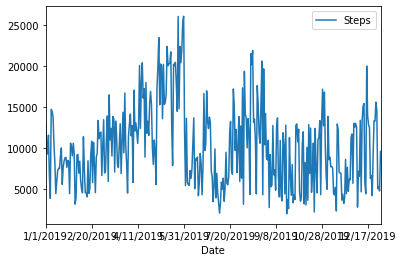

In [0]:
# Very basic plot of steps
df.plot(kind='line', x='Date', y='Steps')

plt.show()

(-3, 367)

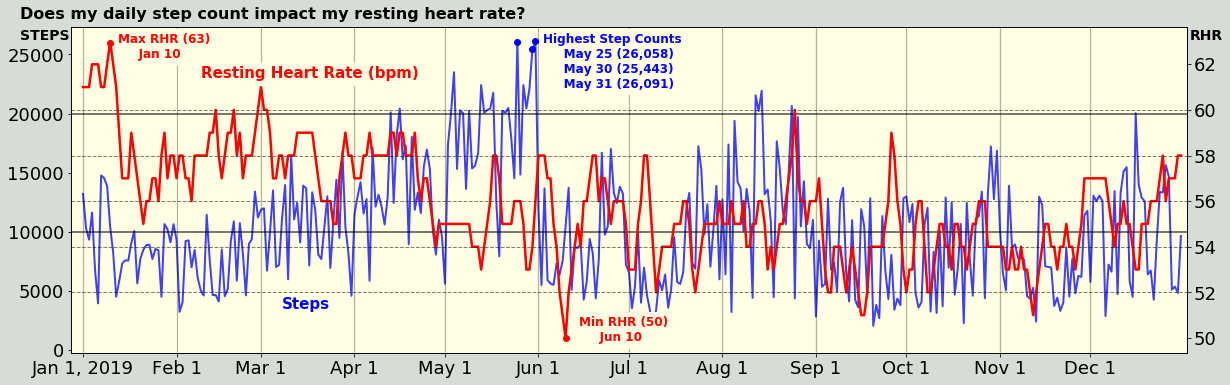

In [6]:
x_range = range(1,366)
xticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

fig = plt.figure(figsize=(20,6), facecolor='#d8dcd6')

# Steps plot
ax1 = fig.add_subplot()
ax1.plot(x_range, df['Steps'], 'b-', linewidth=2, alpha=.75)

# Text blocks
ax1.text(x=40, y=23000, s='Resting Heart Rate (bpm)', 
         color='r', weight='bold', fontsize=15, backgroundcolor='#ffffe4')
ax1.text(x=67, y=3500, s='Steps', 
         color='b', weight='bold', fontsize=15, backgroundcolor='#ffffe4')
ax1.text(x=12.5, y=24700, s='Max RHR (63)\n     Jan 10', 
         color='r', weight='bold', fontsize=12, backgroundcolor='#ffffe4')
ax1.text(x=165.5, y=750, s='Min RHR (50)\n     Jun 10', 
         color='r', weight='bold', fontsize=12, backgroundcolor='#ffffe4')
ax1.text(x=153.5, y=22200, 
         s='Highest Step Counts\n     May 25 (26,058)\n     May 30 (25,443)\n     May 31 (26,091)', 
         color='b', weight='bold', fontsize=12, backgroundcolor='#ffffe4')

ax1.text(x=-20, y=28000, s='Does my daily step count impact my resting heart rate?',
         weight='bold', fontsize=16)
ax1.text(x=-20, y=26200, s='STEPS', weight='bold', fontsize=14)
ax1.text(x=368, y=26200, s='RHR', weight='bold', fontsize=14)

ax1.tick_params(axis='both', which='major', labelsize=18) 
ax1.set_facecolor('#ffffe4')

ax1.axhline(y=10000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=20000, color='black', linewidth=1.5, alpha=.7)

plt.xticks(xticks,
           ["Jan 1, 2019", "Feb 1", "Mar 1", "Apr 1", "May 1", "Jun 1",
            "Jul 1", "Aug 1", "Sep 1", "Oct 1", "Nov 1", "Dec 1"])

# Highlight specific points
plt.plot(10, 26000, 'ro')
plt.plot(161, 1000, 'ro')
plt.plot(151, 26100, 'bo')
plt.plot(145, 26050, 'bo')
plt.plot(150, 25500, 'bo')

for value in xticks:
  ax1.axvline(x=value, color='black', linewidth=1.3, alpha=.3)

# Resting heart rate plot
ax2 = ax1.twinx()
ax2.plot(x_range, df['Resting Heart Rate'], 'r-', linewidth=2.5)
ax2.tick_params(axis='y', labelsize=18)

ax2.axhline(y=52, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=54, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=56, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=58, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=60, color='black', linewidth=1, linestyle='--', alpha=.5)

plt.xlim(-3, 367)

(47, 64)

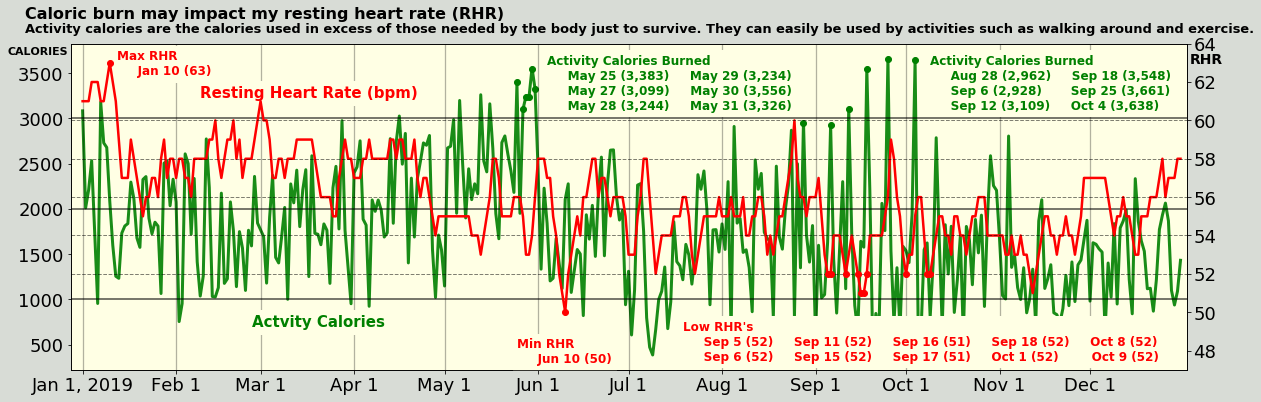

In [7]:
xticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

fig = plt.figure(figsize=(20,6), facecolor='#d8dcd6')

# Activity Calories plot
ax1 = fig.add_subplot()
ax1.plot(x_range, df['Activity Calories'], 'g-', linewidth=3, alpha=.9)

# Text blocks
ax1.text(x=40, y=3230, s='Resting Heart Rate (bpm)', 
         color='r', weight='bold', fontsize=15, backgroundcolor='#ffffe4')
ax1.text(x=57, y=700, s='Actvity Calories', 
         color='g', weight='bold', fontsize=15, backgroundcolor='#ffffe4')
ax1.text(x=12.5, y=3480, s='Max RHR \n     Jan 10 (63)', 
         color='r', weight='bold', fontsize=12, backgroundcolor='#ffffe4')
ax1.text(x=145, y=300, s='Min RHR \n     Jun 10 (50)', 
         color='r', weight='bold', fontsize=12, backgroundcolor='#ffffe4')
ax1.text(x=155, y=3100, 
         s='Activity Calories Burned\n     May 25 (3,383)     May 29 (3,234)\n     May 27 (3,099)     May 30 (3,556)\n     May 28 (3,244)     May 31 (3,326)', 
         color='g', weight='bold', fontsize=12, backgroundcolor='#ffffe4')
ax1.text(x=282, y=3100, 
         s='Activity Calories Burned\n     Aug 28 (2,962)     Sep 18 (3,548)\n     Sep 6 (2,928)       Sep 25 (3,661)\n     Sep 12 (3,109)     Oct 4 (3,638)', 
         color='g', weight='bold', fontsize=12, backgroundcolor='#ffffe4')


ax1.text(x=-18, y=4100, s='Caloric burn may impact my resting heart rate (RHR)',
         weight='bold', fontsize=16)
ax1.text(x=-18, y=3950, s='Activity calories are the calories used in excess of those needed by the body just to survive. They can easily be used by activities such as walking around and exercise.',
         weight='bold', fontsize=13)
ax1.text(x=-24, y=3700, s='CALORIES', weight='bold', fontsize=11)
ax1.text(x=368, y=3600, s='RHR', weight='bold', fontsize=14)

ax1.tick_params(axis='both', which='major', labelsize=18) 
ax1.set_facecolor('#ffffe4')

ax1.axhline(y=1000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=2000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=3000, color='black', linewidth=1.5, alpha=.7)

plt.xticks(xticks,
           ["Jan 1, 2019", "Feb 1", "Mar 1", "Apr 1", "May 1", "Jun 1",
            "Jul 1", "Aug 1", "Sep 1", "Oct 1", "Nov 1", "Dec 1"])

# Highlight specific calorie points
plt.plot(145, 3400, 'go')
plt.plot(147, 3100, 'go')
plt.plot(148, 3240, 'go')
plt.plot(149, 3230, 'go')
plt.plot(150, 3550, 'go')
plt.plot(151, 3325, 'go')
plt.plot(240, 2950, 'go')
plt.plot(249, 2925, 'go')
plt.plot(255, 3100, 'go')
plt.plot(261, 3550, 'go')
plt.plot(268, 3650, 'go')
plt.plot(277, 3640, 'go')

for value in xticks:
  ax1.axvline(x=value, color='black', linewidth=1.3, alpha=.3)

# Resting heart rate plot
ax2 = ax1.twinx()
ax2.plot(x_range, df['Resting Heart Rate'], 'r-', linewidth=2.5)
ax2.tick_params(axis='y', labelsize=18)

ax2.axhline(y=52, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=54, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=56, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=58, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=60, color='black', linewidth=1, linestyle='--', alpha=.5)

ax2.text(x=200, y=47.5, 
         s='''Low RHR\'s\n     Sep 5 (52)     Sep 11 (52)     Sep 16 (51)     Sep 18 (52)     Oct 8 (52)
     Sep 6 (52)     Sep 15 (52)     Sep 17 (51)     Oct 1 (52)        Oct 9 (52)''', 
         color='r', weight='bold', fontsize=12, backgroundcolor='#ffffe4')

# Highlight specific heart rate points
plt.plot(10, 63, 'ro')
plt.plot(161, 50, 'ro')
plt.plot(248, 52, 'ro')
plt.plot(249, 52, 'ro')
plt.plot(254, 52, 'ro')
plt.plot(258, 52, 'ro')
plt.plot(259, 51, 'ro')
plt.plot(260, 51, 'ro')
plt.plot(261, 52, 'ro')
plt.plot(274, 52, 'ro')
plt.plot(281, 52, 'ro')
plt.plot(282, 52, 'ro')

plt.xlim(-3, 367)
plt.ylim(47, 64)

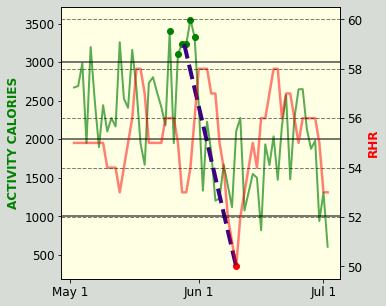

In [0]:
xticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

fig = plt.figure(figsize=(5,5), facecolor='#d8dcd6')

ax1 = fig.add_subplot()
ax1.plot(x_range[121:183], df['Activity Calories'][121:183], 'g-', linewidth=2, alpha=.65)
ax1.set_ylabel('ACTIVITY CALORIES', color='green', weight='bold', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12) 
ax1.set_facecolor('#ffffe4')

plt.plot(161, 350, 'ro')

plt.plot(145, 3400, 'go')
plt.plot(147, 3100, 'go')
plt.plot(148, 3240, 'go')
plt.plot(149, 3230, 'go')
plt.plot(150, 3550, 'go')
plt.plot(151, 3325, 'go')

# Draw dashed line
X = np.linspace(148.5, 161, 50, endpoint=True)
Y = -230.8*X + 37508.8
plt.plot(X, Y, linewidth=4, linestyle='--', color='#380282')

plt.xticks(xticks[4:7],
           ["May 1", "Jun 1", "Jul 1"])

ax1.axhline(y=1000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=2000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=3000, color='black', linewidth=1.5, alpha=.7)

ax2 = ax1.twinx()
ax2.plot(x_range[121:183], df['Resting Heart Rate'][121:183], 'r-', linewidth=2.5, alpha=0.5)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_ylabel('RHR', color='red', weight='bold', fontsize=12)

ax2.axhline(y=52, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=54, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=56, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=58, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=60, color='black', linewidth=1, linestyle='--', alpha=.5)

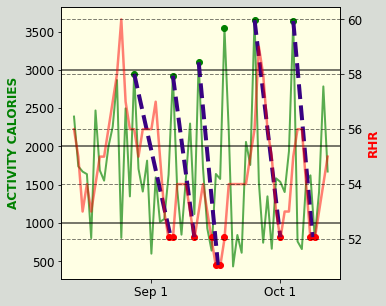

In [0]:
xticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

fig = plt.figure(figsize=(5,5), facecolor='#d8dcd6')



ax1 = fig.add_subplot()
ax1.plot(x_range[225:285], df['Activity Calories'][225:285], 'g-', linewidth=2, alpha=.65)
ax1.set_ylabel('ACTIVITY CALORIES', color='green', weight='bold', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12) 
ax1.set_facecolor('#ffffe4')

plt.xticks(xticks[8:10],
           ["Sep 1", "Oct 1"])

plt.plot(248, 815, 'ro')
plt.plot(249, 815, 'ro')
plt.plot(254, 815, 'ro')
plt.plot(258, 815, 'ro')
plt.plot(259, 450, 'ro')
plt.plot(260, 450, 'ro')
plt.plot(261, 815, 'ro')
plt.plot(274, 815, 'ro')
plt.plot(281, 815, 'ro')
plt.plot(282, 815, 'ro')

plt.plot(240, 2950, 'go')
plt.plot(249, 2925, 'go')
plt.plot(255, 3100, 'go')
plt.plot(261, 3550, 'go')
plt.plot(268, 3650, 'go')
plt.plot(277, 3640, 'go')

ax1.axhline(y=1000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=2000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=3000, color='black', linewidth=1.5, alpha=.7)

# Draw several dashed lines between points
calories = ((240,2950),(249,2925),(255,3100),(268,3650),(277,3640))
rhr = ((248.5,815),(254,815),(259.5,450),(274,815),(281.5,815))
for i in range(len(calories)):
  X = np.linspace(calories[i][0], rhr[i][0], 50, endpoint=True)
  Y = (((calories[i][1]-rhr[i][1])/(calories[i][0]-rhr[i][0]))*(X-calories[i][0])) + calories[i][1]
  plt.plot(X, Y, linewidth=4, linestyle='--', color='#380282') 

ax2 = ax1.twinx()
ax2.plot(x_range[225:285], df['Resting Heart Rate'][225:285], 'r-', linewidth=2.5, alpha=0.5)
ax2.set_ylabel('RHR', color='red', weight='bold', fontsize=12)
ax2.tick_params(axis='y', labelsize=12)

ax2.axhline(y=52, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=54, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=56, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=58, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=60, color='black', linewidth=1, linestyle='--', alpha=.5)



# What follows is my explorations as I tried to determine what, if any, connections could be made to my data and resting heart rate. These visualizations are unpolished as they were only meant to guide me into a direction to explore.

Text(0, 0.5, 'RHR')

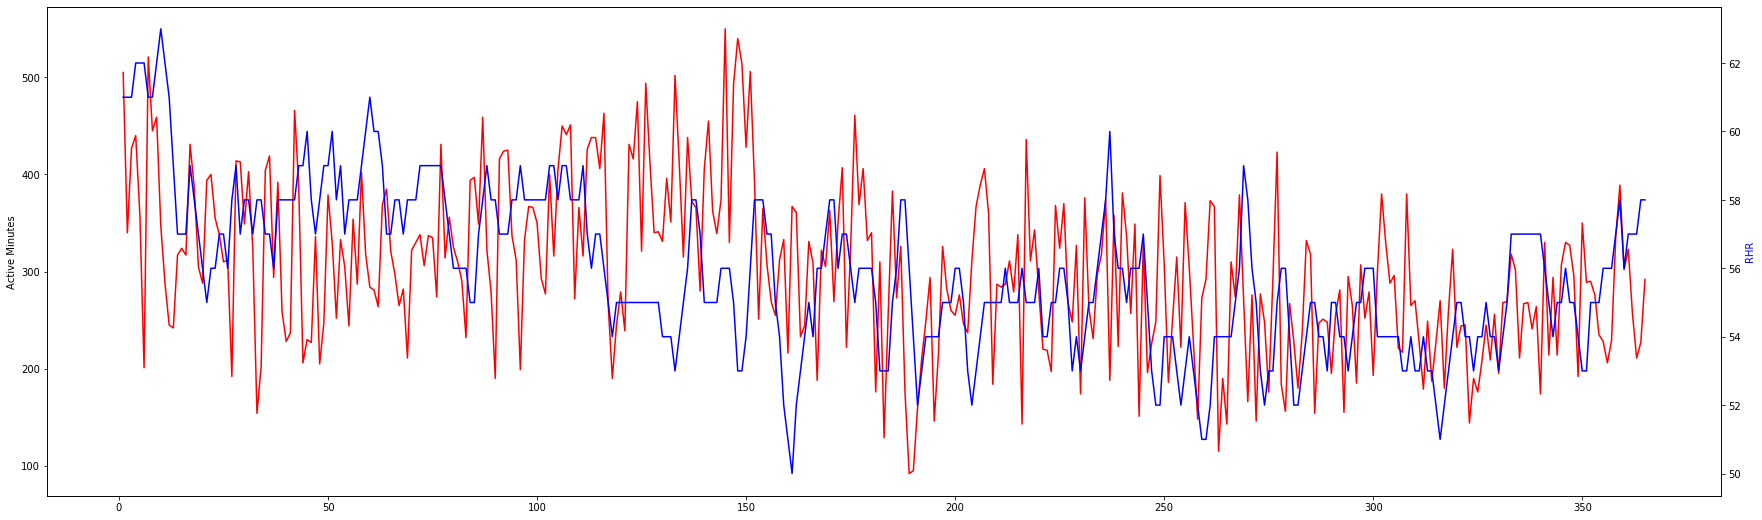

In [0]:
fig = plt.figure(figsize=(30,9))

ax1 = fig.add_subplot()
ax1.plot(x_range, 
         (df['Minutes Fairly Active'] + 
          df['Minutes Very Active'] + 
          df['Minutes Lightly Active']),
         'r-')
ax1.set_ylabel('Active Minutes')

ax2 = ax1.twinx()
ax2.plot(x_range, df['Resting Heart Rate'], 'b-')
ax2.set_ylabel('RHR', color='b')

Text(0, 0.5, 'RHR')

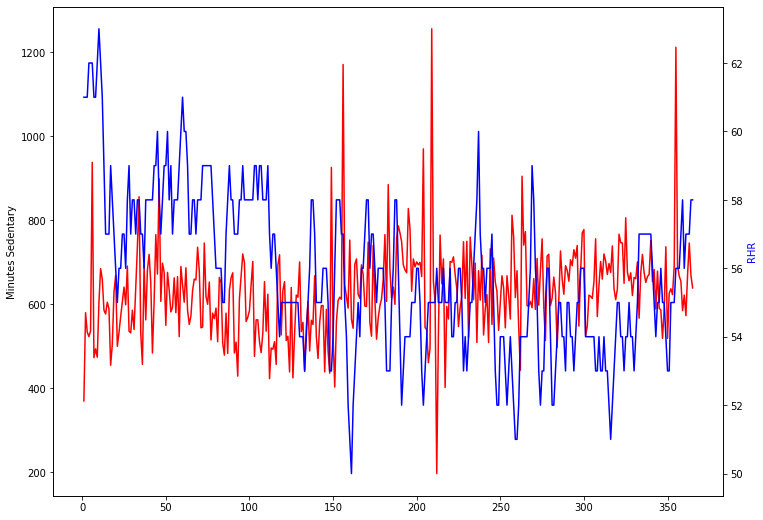

In [0]:
fig = plt.figure(figsize=(12,9))

ax1 = fig.add_subplot()
ax1.plot(x_range, df['Minutes Sedentary'], 'r-')
ax1.set_ylabel('Minutes Sedentary')

ax2 = ax1.twinx()
ax2.plot(x_range, df['Resting Heart Rate'], 'b-')
ax2.set_ylabel('RHR', color='b')

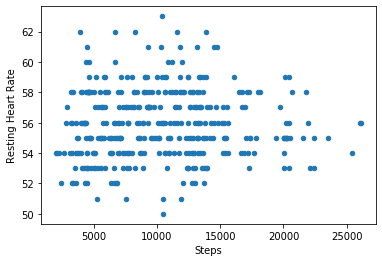

In [0]:
df.plot.scatter(x='Steps', y='Resting Heart Rate')

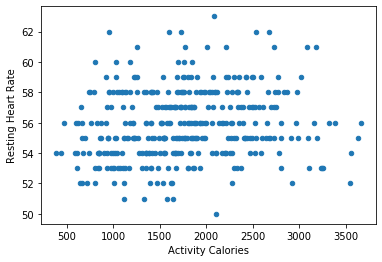

In [0]:
df.plot.scatter(x='Activity Calories', y='Resting Heart Rate')

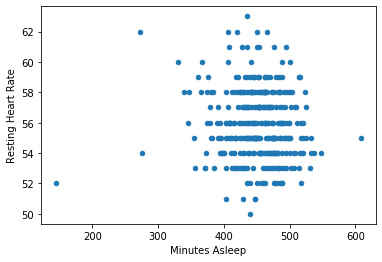

In [0]:
df.plot.scatter(x='Minutes Asleep', y='Resting Heart Rate')

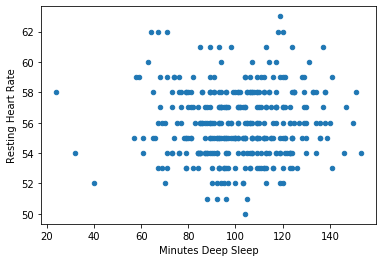

In [0]:
df.plot.scatter(x='Minutes Deep Sleep', y='Resting Heart Rate')

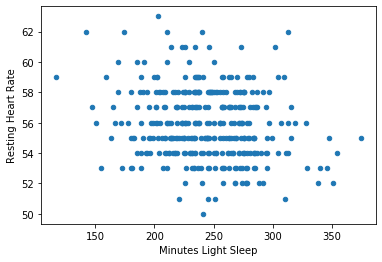

In [0]:
df.plot.scatter(x='Minutes Light Sleep', y='Resting Heart Rate')

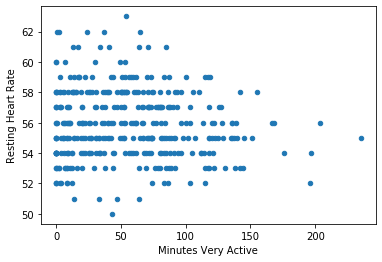

In [0]:
df.plot.scatter(x='Minutes Very Active', y='Resting Heart Rate')

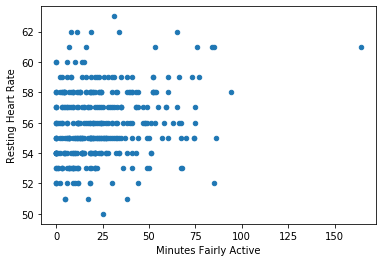

In [0]:
df.plot.scatter(x='Minutes Fairly Active', y='Resting Heart Rate')

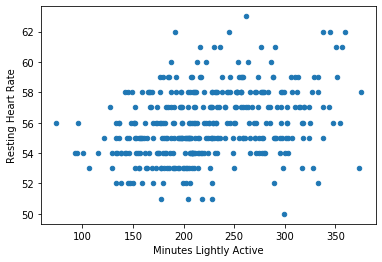

In [0]:
df.plot.scatter(x='Minutes Lightly Active', y='Resting Heart Rate')

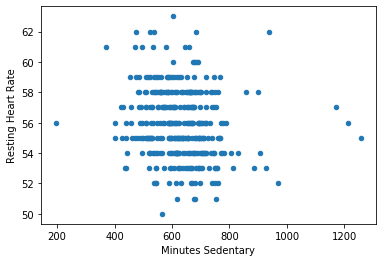

In [0]:
df.plot.scatter(x='Minutes Sedentary', y='Resting Heart Rate')

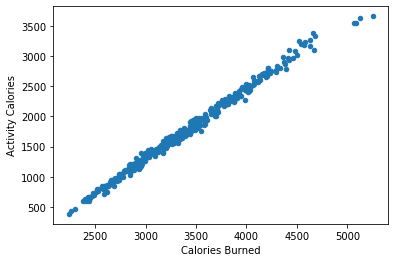

In [0]:
df.plot.scatter(x='Calories Burned', y='Activity Calories')

## These are all comparisons of the same day. I need to look at how the activity of one day impacts the resting heart rate of future days.

In [0]:
rhr = []
steps = []
for i in range(364):
  steps.append(df.iloc[i, 2])
  rhr.append(df.iloc[i+1, 10]) # 1 day after steps count

In [0]:
print(steps)
print(rhr)

[13195, 10305, 9323, 11617, 6714, 3926, 14758, 14534, 13858, 10398, 8236, 4486, 5828, 7305, 7573, 7551, 9041, 10055, 5621, 7700, 8470, 8864, 8904, 7687, 8542, 8416, 4485, 10642, 10212, 9097, 10635, 9331, 3213, 4019, 9199, 9264, 6980, 8444, 6129, 5051, 4589, 11428, 7639, 4630, 4633, 4097, 8501, 4530, 5157, 9198, 10874, 5849, 10731, 8148, 4603, 8958, 9377, 13398, 11192, 11853, 11981, 6696, 9972, 13499, 7012, 7188, 11152, 13946, 5963, 16516, 11033, 12445, 9083, 13895, 13664, 7135, 13325, 11819, 8067, 7677, 10298, 12996, 6927, 10896, 14394, 9474, 16752, 10364, 8161, 4572, 11490, 12938, 14185, 11525, 12758, 5849, 17104, 12115, 13122, 12087, 10603, 12867, 20094, 12427, 18146, 20424, 16122, 17285, 8934, 18015, 11851, 13314, 11568, 15518, 16953, 15284, 10054, 8053, 11018, 9621, 5590, 17379, 20022, 23498, 15308, 20271, 20030, 13617, 20237, 15345, 15608, 16624, 22412, 20065, 20297, 20418, 21753, 12645, 7911, 20235, 20071, 20476, 17863, 14513, 26058, 14826, 22404, 20432, 22082, 25443, 26091, 1188

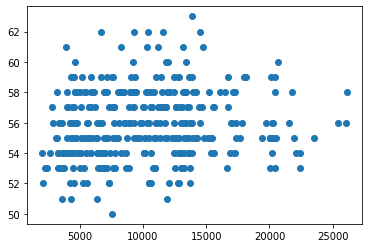

In [0]:
plt.scatter(steps, rhr)

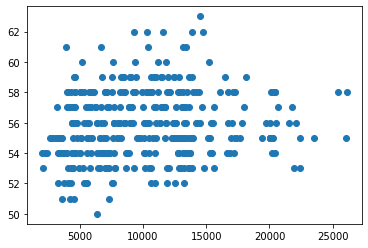

In [0]:
rhr = []
steps = []
for i in range(363):
  steps.append(df.iloc[i, 2])
  rhr.append(df.iloc[i+2, 10]) # 2 days after steps count

plt.scatter(steps, rhr)

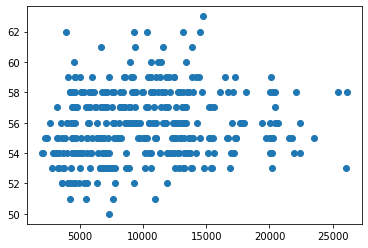

In [0]:
rhr = []
steps = []
for i in range(362):
  steps.append(df.iloc[i, 2])
  rhr.append(df.iloc[i+3, 10]) # 3 days after steps count

plt.scatter(steps, rhr)

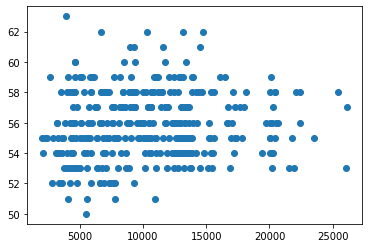

In [0]:
rhr = []
steps = []
for i in range(361):
  steps.append(df.iloc[i, 2])
  rhr.append(df.iloc[i+4, 10]) # 4 days after steps count

plt.scatter(steps, rhr)

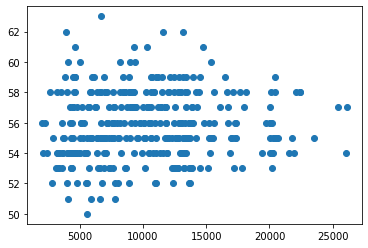

In [0]:
rhr = []
steps = []
for i in range(360):
  steps.append(df.iloc[i, 2])
  rhr.append(df.iloc[i+5, 10]) # 5 days after steps count

plt.scatter(steps, rhr)

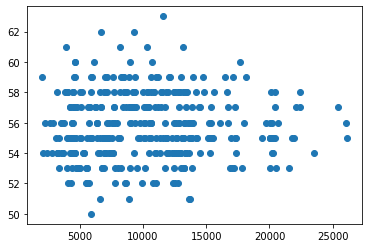

In [0]:
rhr = []
steps = []
for i in range(359):
  steps.append(df.iloc[i, 2])
  rhr.append(df.iloc[i+6, 10]) # 6 days after steps count

plt.scatter(steps, rhr)

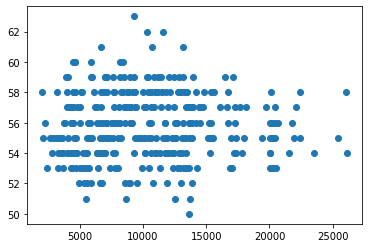

In [0]:
rhr = []
steps = []
for i in range(358):
  steps.append(df.iloc[i, 2])
  rhr.append(df.iloc[i+7, 10]) # 7 days after steps count

plt.scatter(steps, rhr)

## Steps are not looking great; at least, not seeing immediate connection here.   

Also, create a loop to cycle through the subsequent days; that way I don't have to do it manually.

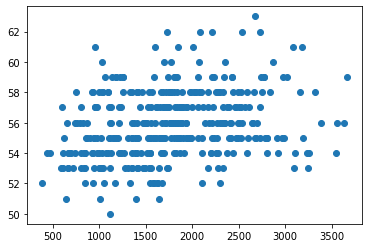

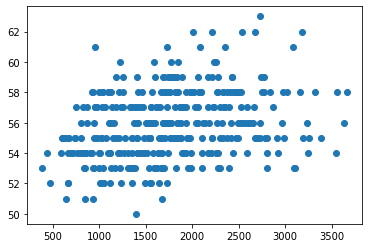

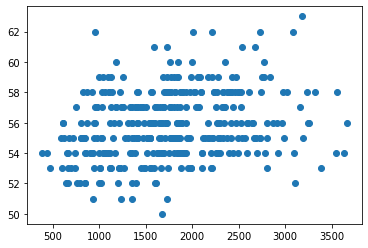

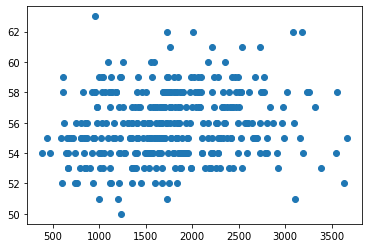

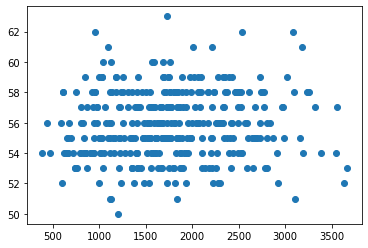

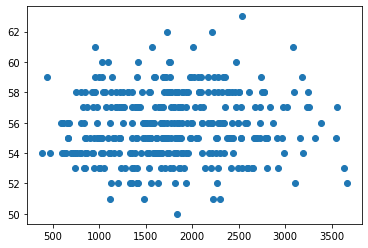

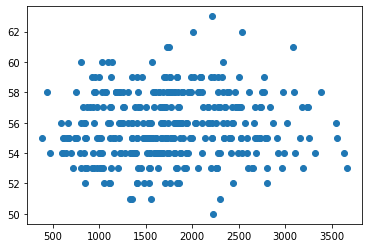

In [0]:
# Looking at active calories

for n in range(1, 8):
  rhr = []
  act_cal = []
  for i in range(365 - n):
    act_cal.append(df.iloc[i, 9])
    rhr.append(df.iloc[i+n, 10]) # n days after active calories count

  plt.scatter(act_cal, rhr)
  plt.show()

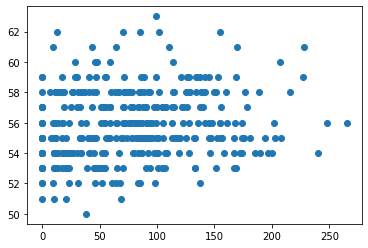

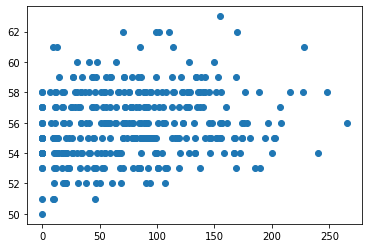

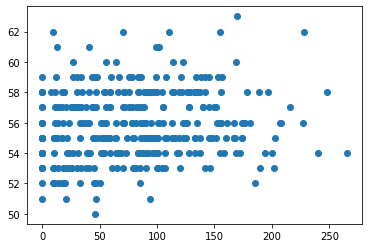

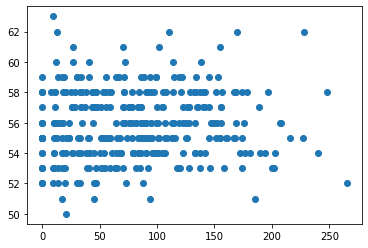

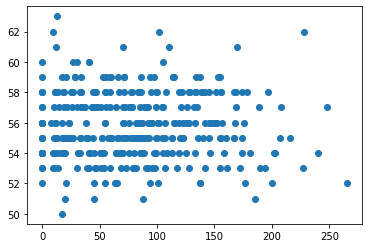

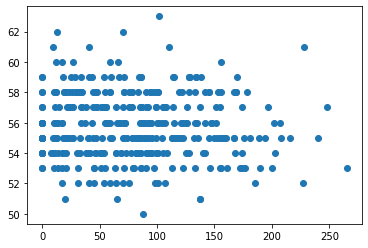

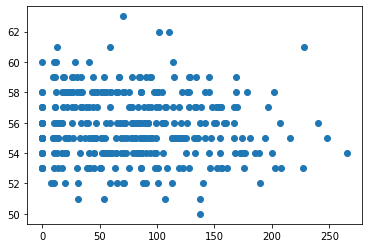

In [0]:
# Looking at fairly active minutes + very active minutes

for n in range(1, 8):
  rhr = []
  f_v_act_min = []
  for i in range(365 - n):
    f_v_act_min.append(df.iloc[i, 7] + df.iloc[i, 8])
    rhr.append(df.iloc[i+n, 10]) # n days after active calories count

  plt.scatter(f_v_act_min, rhr)
  plt.show()

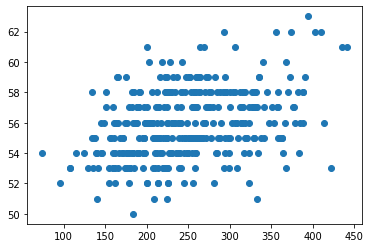

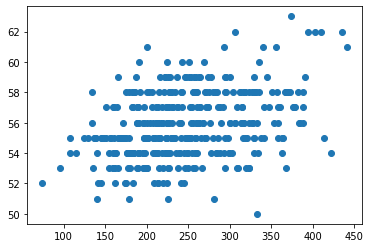

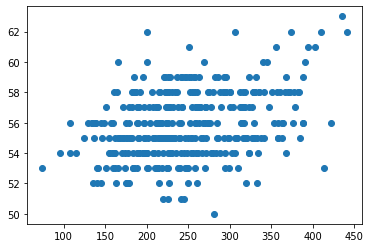

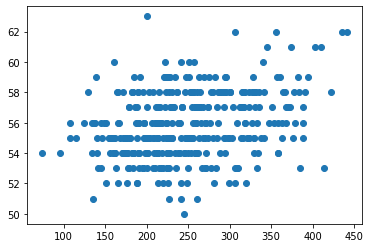

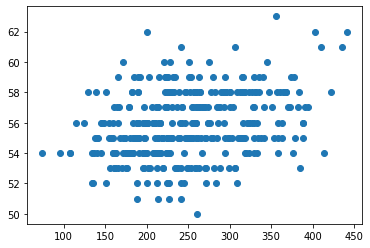

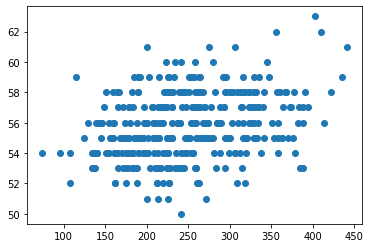

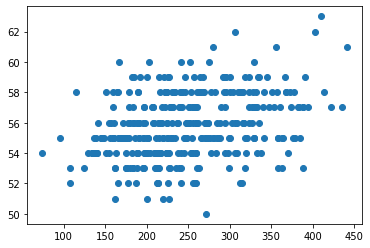

In [0]:
# Looking at lightly active minutes + fairly active minutes

for n in range(1, 8):
  rhr = []
  l_f_act_min = []
  for i in range(365 - n):
    l_f_act_min.append(df.iloc[i, 6] + df.iloc[i, 7])
    rhr.append(df.iloc[i+n, 10]) # n days after active calories count

  plt.scatter(l_f_act_min, rhr)
  plt.show()

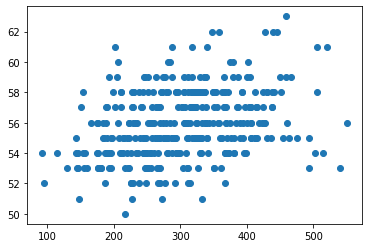

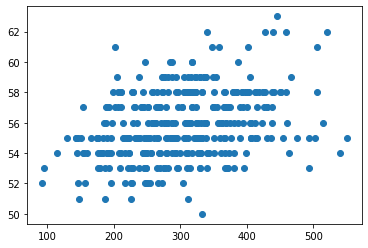

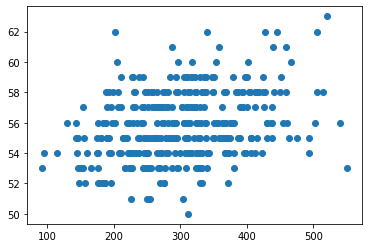

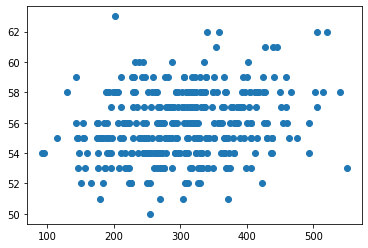

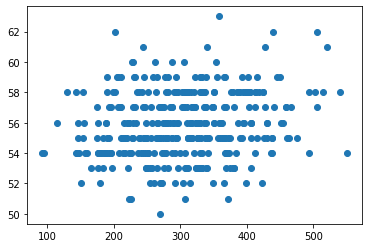

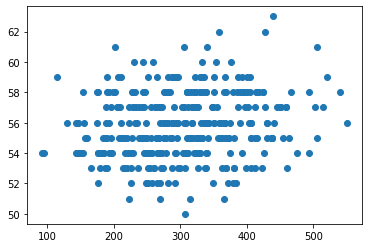

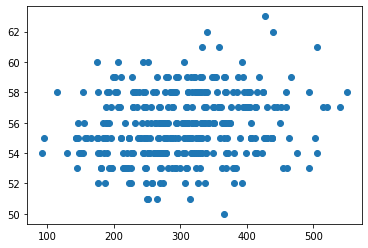

In [0]:
# Looking at lightly active minutes + fairly active minutes + very active minutes

for n in range(1, 8):
  rhr = []
  l_f_v_act_min = []
  for i in range(365 - n):
    l_f_v_act_min.append(df.iloc[i, 6] + df.iloc[i, 7] + df.iloc[i,8])
    rhr.append(df.iloc[i+n, 10]) # n days after active calories count

  plt.scatter(l_f_v_act_min, rhr)
  plt.show()

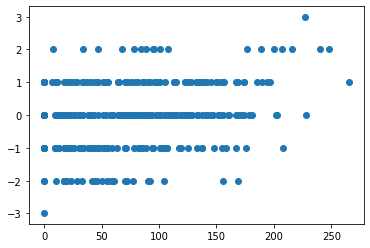

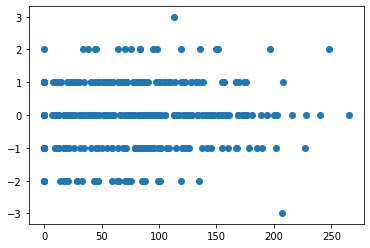

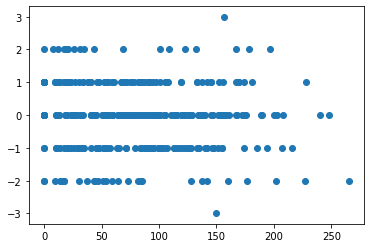

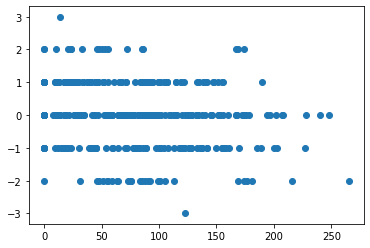

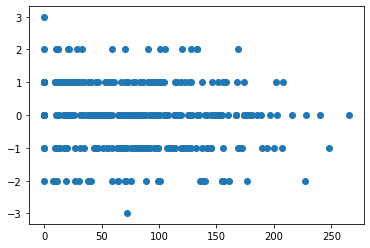

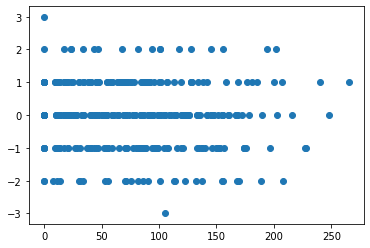

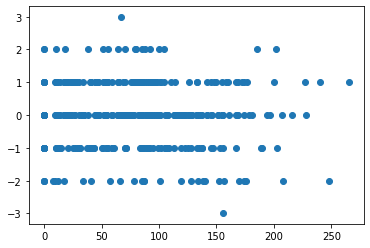

In [0]:
# Looking at fairly active minutes + very active minutes and change in heart rate

for n in range(1, 8):
  rhr = []
  f_v_act_min = []
  for i in range(365 - n):
    f_v_act_min.append(df.iloc[i, 7] + df.iloc[i, 8])
    rhr.append(df.iloc[i+n, 10] - df.iloc[i+n-1, 10]) # Difference in heart rate

  plt.scatter(f_v_act_min, rhr)
  plt.show()

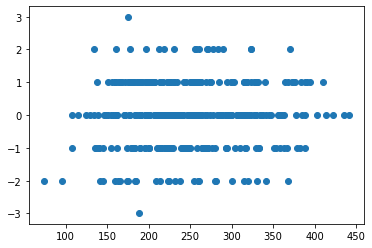

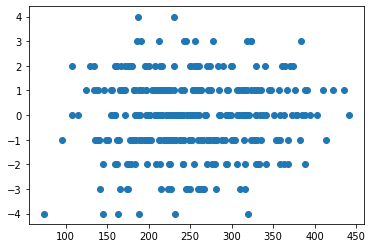

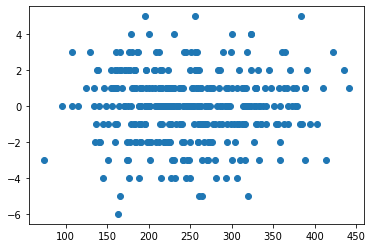

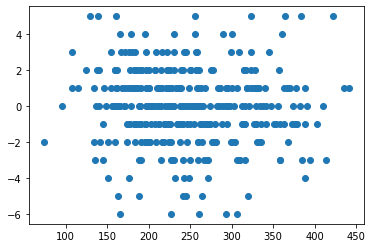

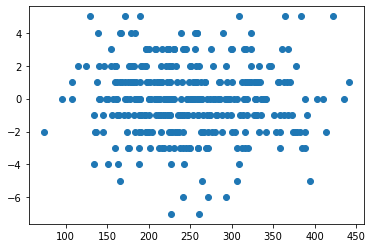

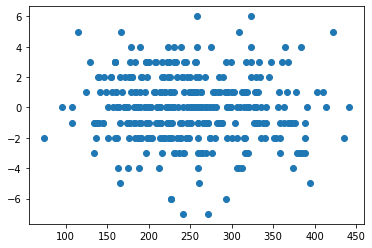

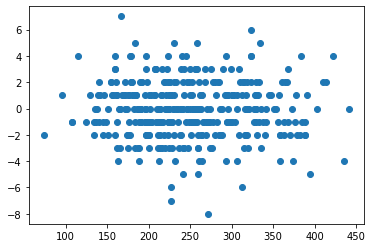

In [0]:
# Looking at lightly active minutes + fairly active minutes and change in rhr

for n in range(1, 8):
  rhr = []
  l_f_act_min = []
  for i in range(365 - n):
    l_f_act_min.append(df.iloc[i, 6] + df.iloc[i, 7])
    rhr.append(df.iloc[i+n, 10] - df.iloc[i, 10]) 

  plt.scatter(l_f_act_min, rhr)
  plt.show()

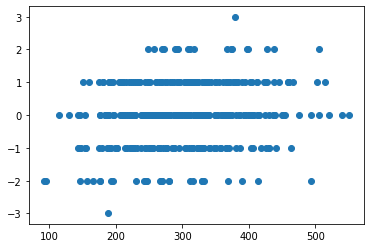

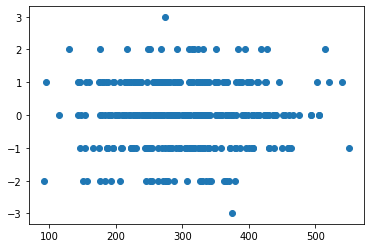

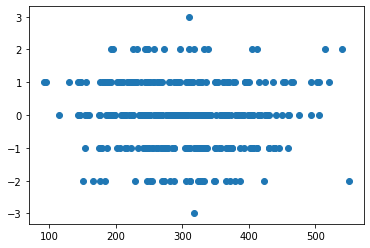

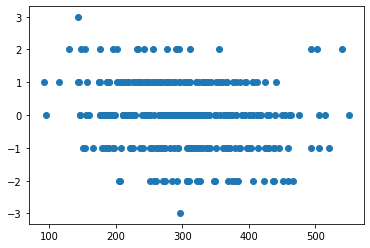

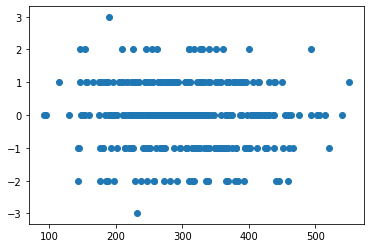

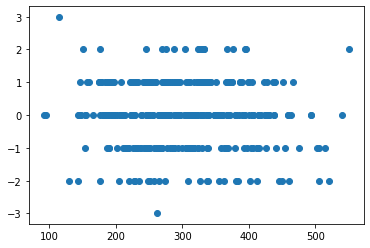

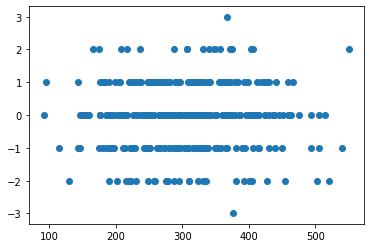

In [0]:
# Looking at lightly active minutes + fairly active minutes + very active minutes

for n in range(1, 8):
  rhr = []
  l_f_v_act_min = []
  for i in range(365 - n):
    l_f_v_act_min.append(df.iloc[i, 6] + df.iloc[i, 7] + df.iloc[i,8])
    rhr.append(df.iloc[i+n, 10] - df.iloc[i+n-1, 10]) # n days after active calories count

  plt.scatter(l_f_v_act_min, rhr)
  plt.show()

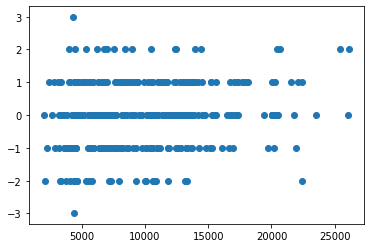

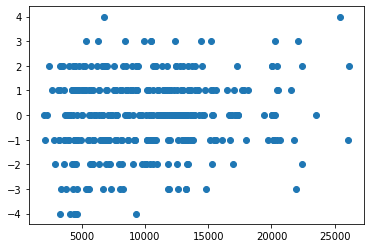

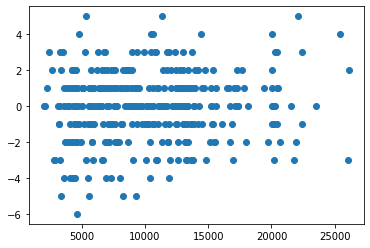

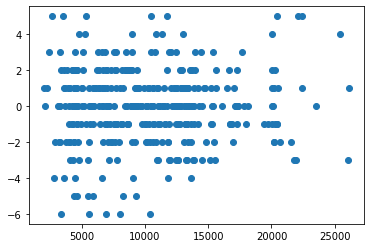

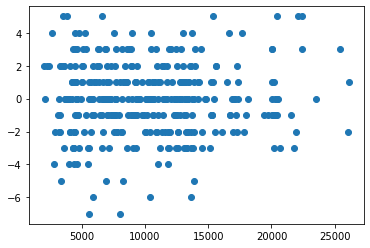

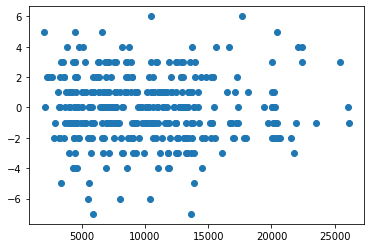

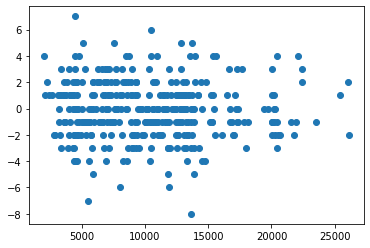

In [0]:
# Looking at steps and change in heart rate

for n in range(1, 8):
  rhr = []
  steps = []
  for i in range(365 - n):
    steps.append(df.iloc[i, 2])
    rhr.append(df.iloc[i+n, 10] - df.iloc[i, 10]) # Difference in heart rate

  plt.scatter(steps, rhr)
  plt.show()

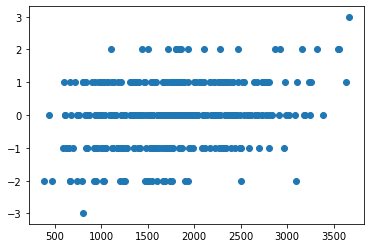

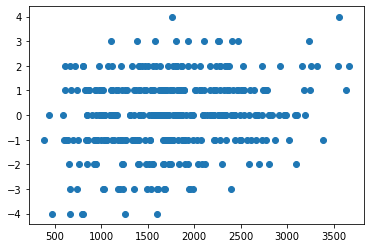

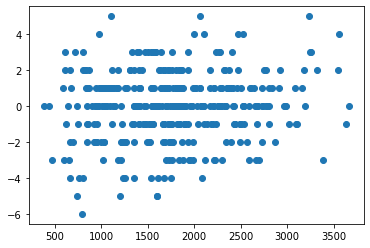

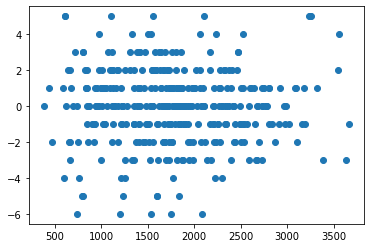

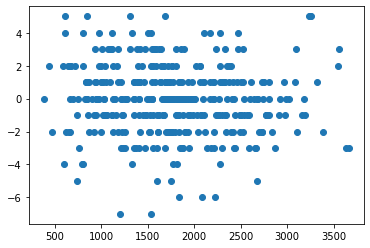

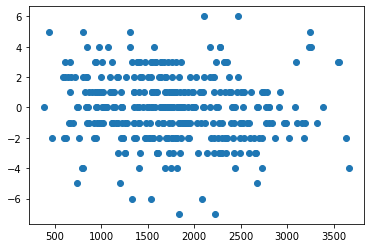

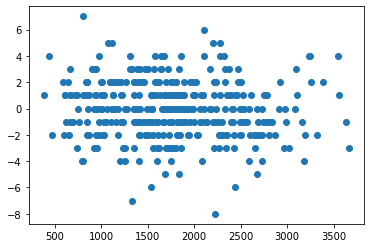

In [0]:
# Looking at active calories and change in heart rate

for n in range(1, 8):
  rhr = []
  act_cal = []
  for i in range(365 - n):
    act_cal.append(df.iloc[i, 9])
    rhr.append(df.iloc[i+n, 10] - df.iloc[i, 10]) # Difference in heart rate

  plt.scatter(act_cal, rhr)
  plt.show()

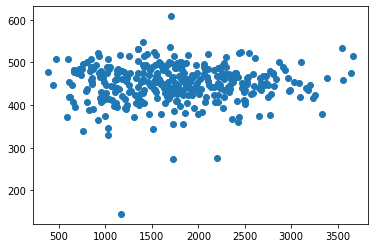

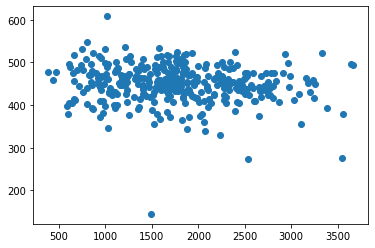

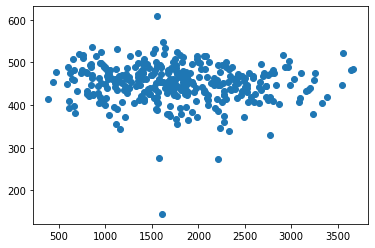

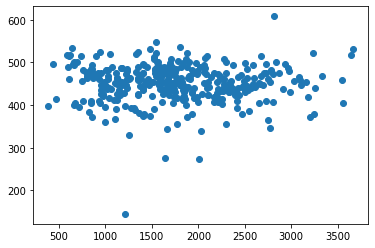

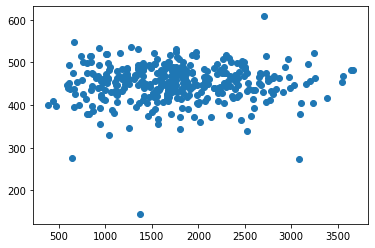

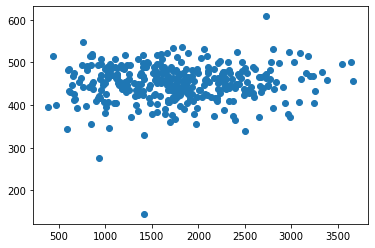

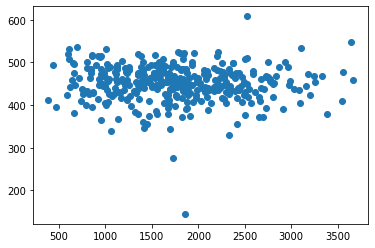

In [0]:
# Looking at active calories and overall sleep

for n in range(1, 8):
  min_sleep = []
  act_cal = []
  for i in range(365 - n):
    act_cal.append(df.iloc[i, 9])
    min_sleep.append(df.iloc[i+n, 13]) # Time slept that night

  plt.scatter(act_cal, min_sleep)
  plt.show()

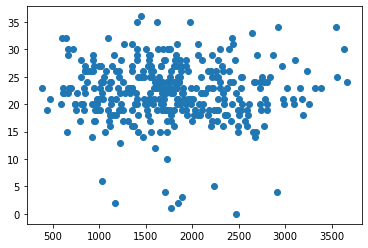

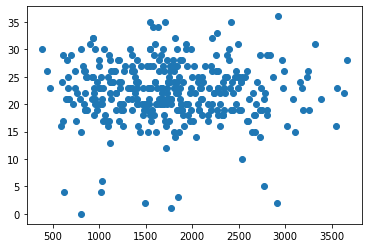

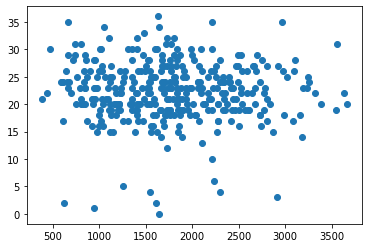

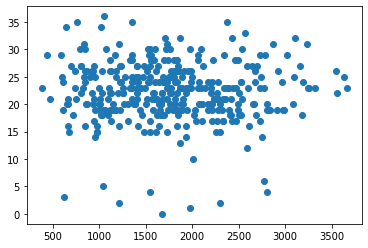

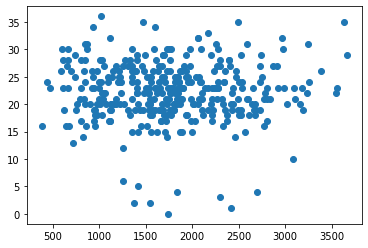

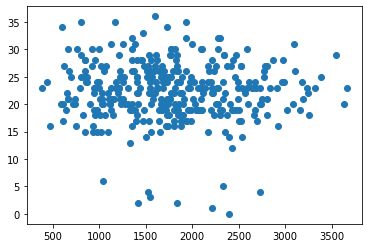

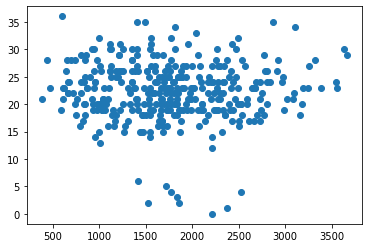

In [0]:
# Looking at active calories and times awake at night

for n in range(1, 8):
  times_awake = []
  act_cal = []
  for i in range(365 - n):
    act_cal.append(df.iloc[i, 9])
    times_awake.append(df.iloc[i+n, 15]) # Number of wake ups

  plt.scatter(act_cal, times_awake)
  plt.show()

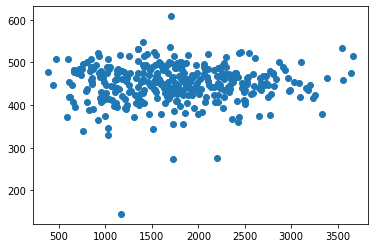

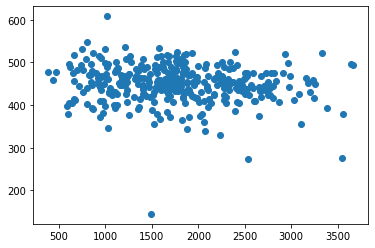

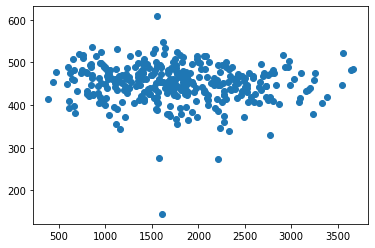

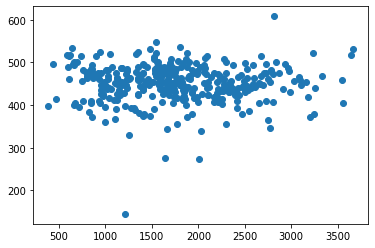

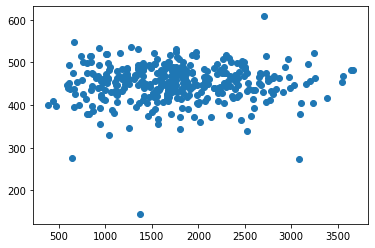

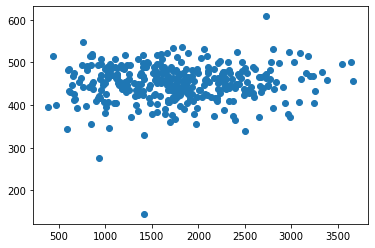

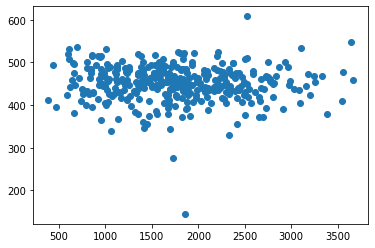

In [0]:
# Looking at active calories and deep sleep

for n in range(1, 8):
  min_deep_sleep = []
  act_cal = []
  for i in range(365 - n):
    act_cal.append(df.iloc[i, 9])
    min_deep_sleep.append(df.iloc[i+n, 13]) # Time slept that night

  plt.scatter(act_cal, min_deep_sleep)
  plt.show()

# Let's try graphing other columns against each other now.

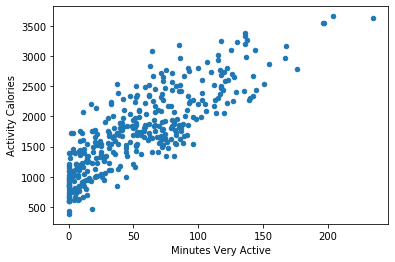

In [0]:
df.plot.scatter(x='Minutes Very Active', y='Activity Calories')

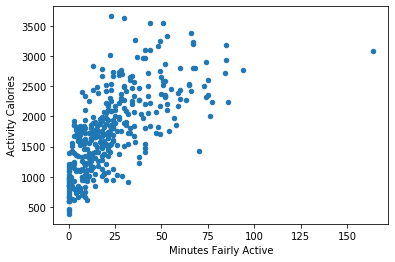

In [0]:
df.plot.scatter(x='Minutes Fairly Active', y='Activity Calories')

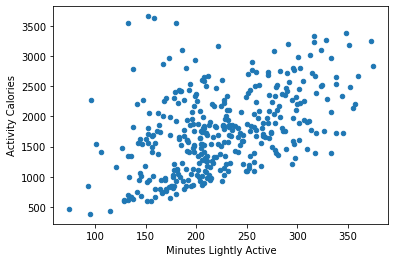

In [0]:
df.plot.scatter(x='Minutes Lightly Active', y='Activity Calories')

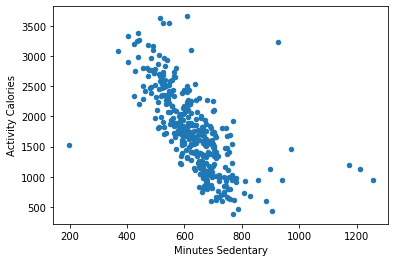

In [0]:
df.plot.scatter(x='Minutes Sedentary', y='Activity Calories')

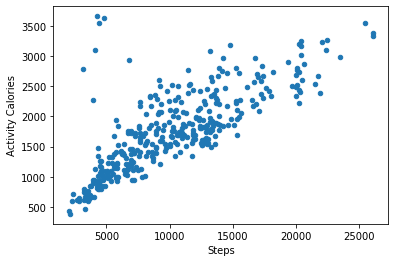

In [0]:
df.plot.scatter(x='Steps', y='Activity Calories')

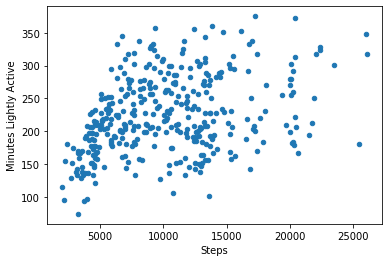

In [0]:
df.plot.scatter(x='Steps', y='Minutes Lightly Active')

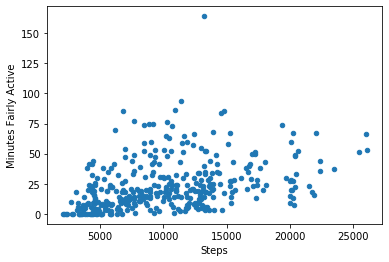

In [0]:
df.plot.scatter(x='Steps', y='Minutes Fairly Active')

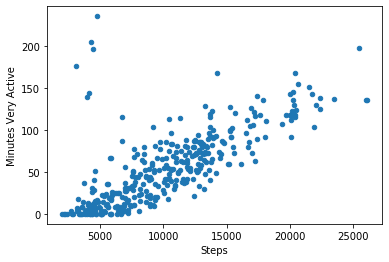

In [0]:
df.plot.scatter(x='Steps', y='Minutes Very Active')

In [0]:
df[(df['Steps']<6000) & (df['Minutes Very Active']>100)]

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Resting Heart Rate,Sleep - Start Time,Sleep - End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
185,7/5/2019,3982,3982,0.90,10,641,96,38,139,2278,56,2019-07-04 11:44PM,2019-07-05 7:17AM,394.0,59.0,17.0,453.0,110.0,214.0,70.0
254,9/12/2019,4668,4093,1.16,4,622,186,41,144,3109,53,2019-09-12 12:08AM,2019-09-12 7:35AM,404.0,43.0,16.0,447.0,140.0,155.0,109.0
260,9/18/2019,5089,4457,1.69,8,545,133,44,196,3548,52,2019-09-17 10:34PM,2019-09-18 7:16AM,460.0,62.0,26.0,522.0,69.0,278.0,113.0
267,9/25/2019,5254,4291,1.53,6,607,152,23,204,3661,56,2019-09-24 10:59PM,2019-09-25 6:33AM,410.0,44.0,24.0,454.0,78.0,226.0,106.0
276,10/4/2019,5121,4788,1.20,15,514,158,30,235,3638,55,2019-10-03 11:11PM,2019-10-04 7:34AM,437.0,66.0,28.0,503.0,109.0,233.0,95.0
283,10/11/2019,4396,3121,1.17,8,497,138,18,176,2785,54,2019-10-10 9:36PM,2019-10-11 7:48AM,548.0,63.0,30.0,611.0,138.0,287.0,123.0


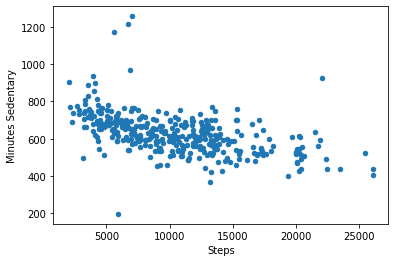

In [0]:
df.plot.scatter(x='Steps', y='Minutes Sedentary')

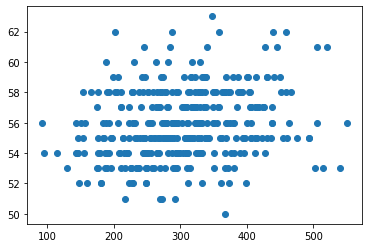

In [0]:
# Looking at lightly active minutes + fairly active minutes + very active minutes

act_cal = []
l_f_v_act_min = []
for i in range(364):
  l_f_v_act_min.append(df.iloc[i, 6] + df.iloc[i, 7] + df.iloc[i,8])
  act_cal.append(df.iloc[i, 10])

plt.scatter(l_f_v_act_min, act_cal)
plt.show()

In [0]:
diff_rhr = []
for i in range(len(df['Resting Heart Rate']) - 1):
  diff_rhr.append(df.iloc[i+1, 10] - df.iloc[i, 10])

In [0]:
len(diff_rhr)

364

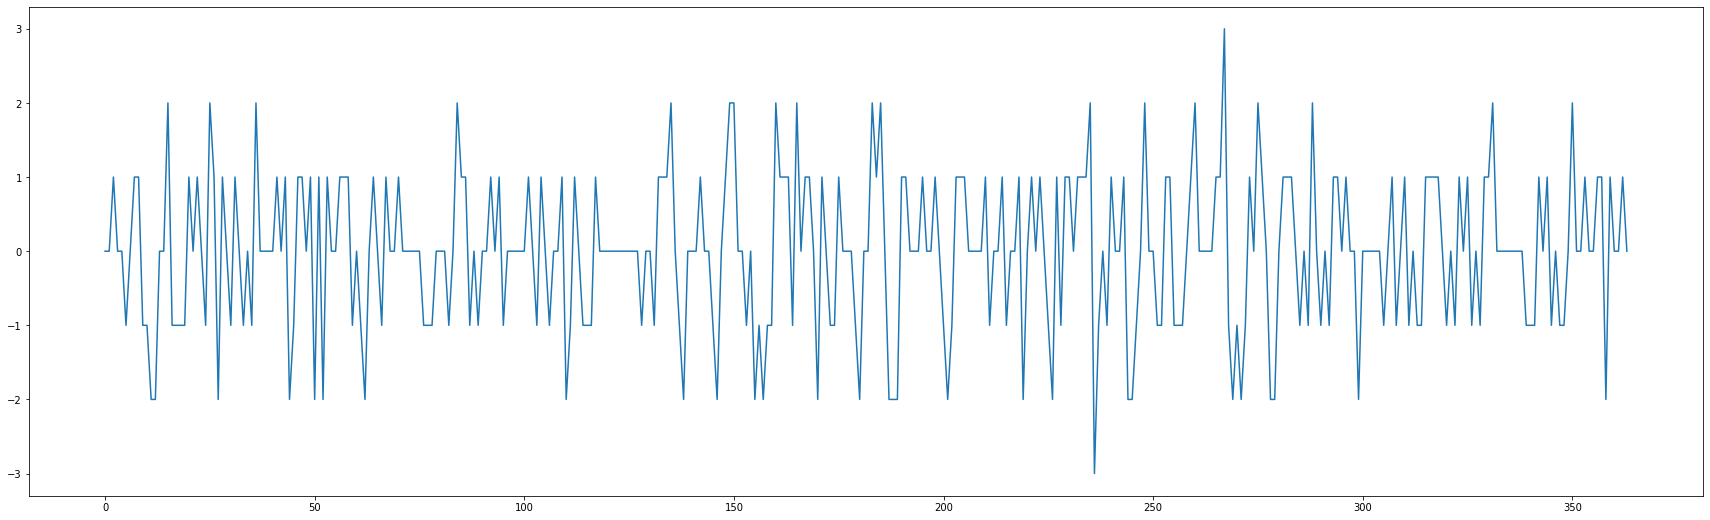

In [0]:
plt.figure(figsize=(30,9))
plt.plot(range(364), diff_rhr)

In [0]:
diff_steps = []
for i in range(len(df['Steps']) - 1):
  diff_steps.append(df.iloc[i+1, 2] - df.iloc[i, 2])

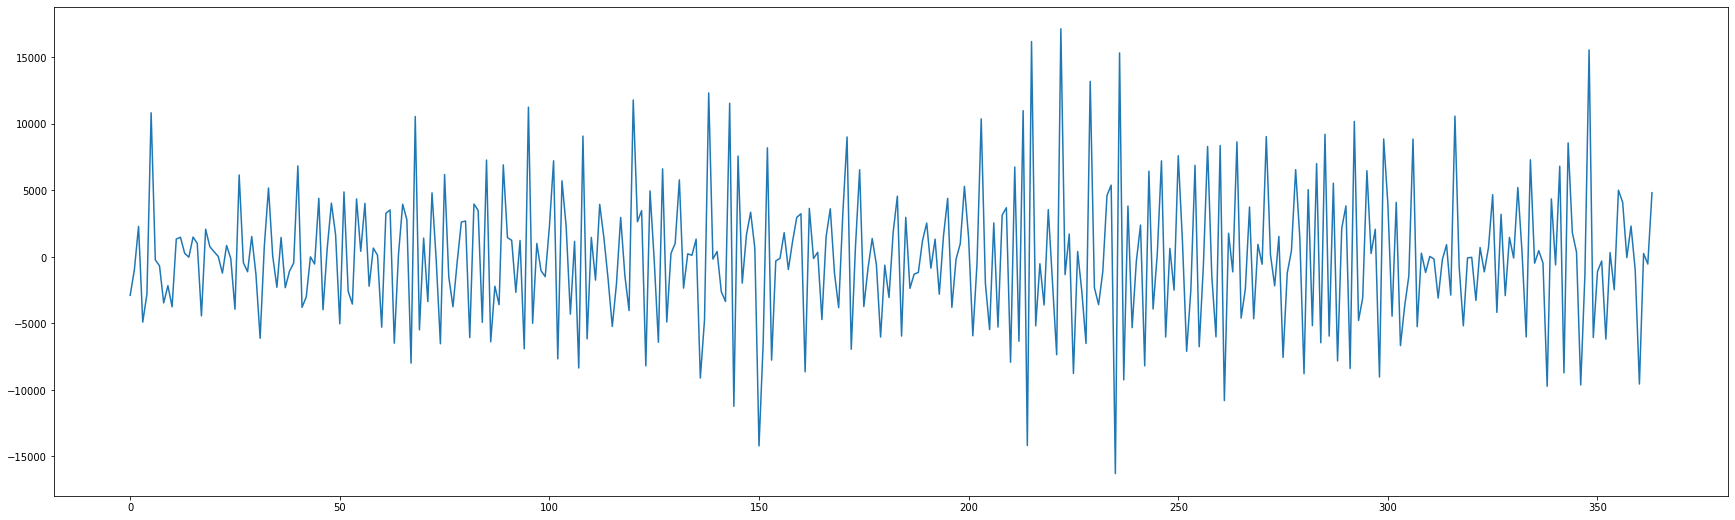

In [0]:
plt.figure(figsize=(30,9))
plt.plot(range(364), diff_steps)

In [0]:
df.sort_values(by='Calories Burned', ascending=False).head(10)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Resting Heart Rate,Sleep - Start Time,Sleep - End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
267,9/25/2019,5254,4291,1.53,6,607,152,23,204,3661,56,2019-09-24 10:59PM,2019-09-25 6:33AM,410.0,44.0,24.0,454.0,78.0,226.0,106.0
276,10/4/2019,5121,4788,1.20,15,514,158,30,235,3638,55,2019-10-03 11:11PM,2019-10-04 7:34AM,437.0,66.0,28.0,503.0,109.0,233.0,95.0
260,9/18/2019,5089,4457,1.69,8,545,133,44,196,3548,52,2019-09-17 10:34PM,2019-09-18 7:16AM,460.0,62.0,26.0,522.0,69.0,278.0,113.0
149,5/30/2019,5070,25443,10.17,43,524,180,51,197,3556,54,2019-05-29 10:45PM,2019-05-30 6:53AM,416.0,72.0,26.0,488.0,77.0,217.0,122.0
150,5/31/2019,4682,26091,11.99,20,403,317,53,136,3326,56,2019-05-30 10:22PM,2019-05-31 7:13AM,458.0,73.0,25.0,531.0,53.0,271.0,134.0
254,9/12/2019,4668,4093,1.16,4,622,186,41,144,3109,53,2019-09-12 12:08AM,2019-09-12 7:35AM,404.0,43.0,16.0,447.0,140.0,155.0,109.0
144,5/25/2019,4658,26058,12.28,24,439,348,66,136,3383,56,2019-05-24 10:54PM,2019-05-25 6:25AM,406.0,45.0,19.0,451.0,75.0,211.0,120.0
135,5/16/2019,4633,20418,10.13,45,489,222,48,168,3160,56,2019-05-15 10:01PM,2019-05-16 6:35AM,474.0,39.0,24.0,513.0,126.0,255.0,93.0
132,5/13/2019,4631,22412,10.33,11,440,328,36,138,3260,53,2019-05-12 10:06PM,2019-05-13 6:25AM,423.0,75.0,23.0,498.0,91.0,237.0,95.0
148,5/29/2019,4579,22082,10.34,11,926,317,67,130,3234,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
tiny_df = df[df['Calories Burned']>4000]

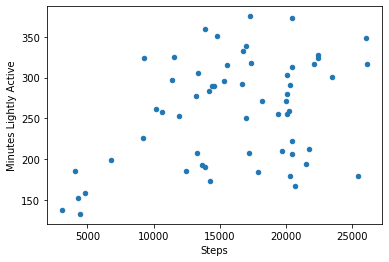

In [0]:
tiny_df.plot.scatter(x='Steps', y='Minutes Lightly Active')

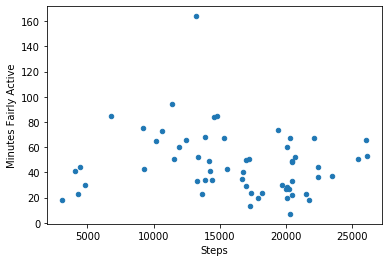

In [0]:
tiny_df.plot.scatter(x='Steps', y='Minutes Fairly Active')

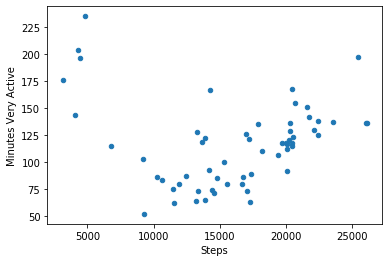

In [0]:
tiny_df.plot.scatter(x='Steps', y='Minutes Very Active')

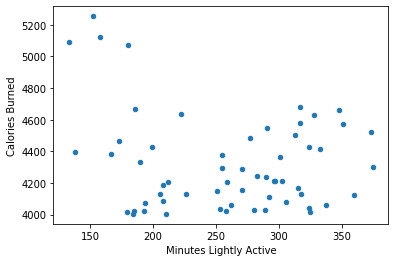

In [0]:
tiny_df.plot.scatter(x='Minutes Lightly Active', y='Calories Burned')

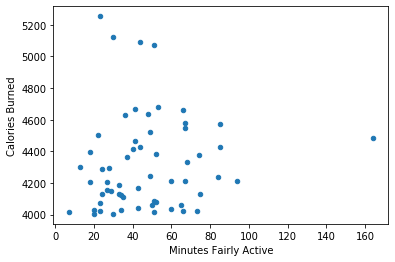

In [0]:
tiny_df.plot.scatter(x='Minutes Fairly Active', y='Calories Burned')

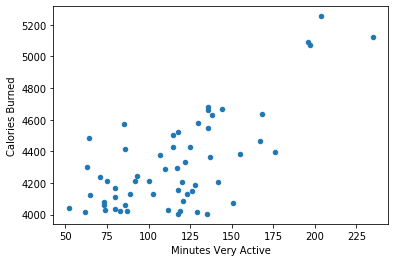

In [0]:
tiny_df.plot.scatter(x='Minutes Very Active', y='Calories Burned')

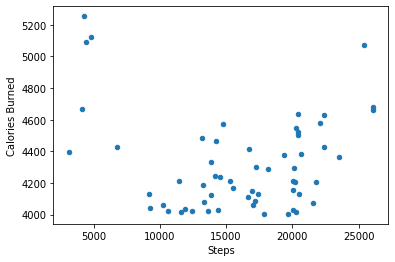

In [0]:
tiny_df.plot.scatter(x='Steps', y='Calories Burned')

# I'm going to try some PCA

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df2 = pd.read_csv('Fitbit - 2019 - Combined.csv')
df2 = df2.dropna()

In [0]:
# Get rid of commas
df2['Calories Burned'] = df2['Calories Burned'].str.replace(',', '')
df2['Steps'] = df2['Steps'].str.replace(',', '')
df2['Minutes Sedentary'] = df2['Minutes Sedentary'].str.replace(',', '')
df2['Activity Calories'] = df2['Activity Calories'].str.replace(',', '')

In [0]:
# Convert to int
df['Calories Burned'] = df['Calories Burned'].apply(pd.to_numeric)
df['Steps'] = df['Steps'].apply(pd.to_numeric)
df['Minutes Sedentary'] = df['Minutes Sedentary'].apply(pd.to_numeric)
df['Activity Calories'] = df['Activity Calories'].apply(pd.to_numeric)

In [0]:
Y = df2['Resting Heart Rate']
X = df2.drop(['Date', 
             'Sleep - Start Time', 
             'Sleep - End Time', 
             'Resting Heart Rate'], 
            axis=1)

In [0]:
scaler = StandardScaler()
Z = scaler.fit_transform(X)

In [0]:
Z

array([[ 1.8635192 ,  0.59150263,  0.54447856, ...,  1.19400706,
        -0.45741757,  0.58415932],
       [ 0.50945892,  0.01380139, -0.00711003, ..., -0.56591122,
         0.74798484, -0.61103998],
       [ 0.59376509, -0.1824971 , -0.192345  , ..., -0.30925647,
         0.05551962, -0.81023987],
       ...,
       [-1.17838495, -0.97668639, -0.95386656, ..., -0.82256597,
        -0.30353642,  0.7833592 ],
       [-1.03041903, -1.08383098, -1.04854222, ..., -1.00589079,
         0.79927856,  1.18175897],
       [-0.48500974, -0.11912987, -0.14294901, ..., -1.37254043,
        -0.17530212,  1.82915859]])

In [0]:
pca = PCA(2)
transformed_data = pca.fit_transform(Z)

transformed_data

array([[ 5.00454321e+00, -2.44002234e+00],
       [ 9.19549576e-01, -1.93277054e-01],
       [ 1.25986060e+00,  1.05012003e+00],
       [ 2.47235354e+00,  1.55067968e+00],
       [-8.19935747e-01, -8.78765543e-01],
       [-2.97922601e+00,  8.56184150e+00],
       [ 4.57379485e+00,  1.82676113e+00],
       [ 3.24856435e+00, -4.17101202e-02],
       [ 2.87600855e+00, -1.62257375e-01],
       [ 9.16530373e-01,  1.43772990e+00],
       [-8.78031535e-01,  2.06355619e+00],
       [-1.99105903e+00, -6.30683526e-01],
       [-2.08181430e+00, -2.90400412e+00],
       [-7.75404852e-01, -7.72194184e-01],
       [-1.54706642e-01, -6.56675068e-02],
       [-1.50384321e-01, -6.84887315e-01],
       [ 1.53728185e+00, -1.76940283e+00],
       [ 1.10061346e+00, -1.59563395e+00],
       [-7.18587395e-01,  5.78336296e-01],
       [-1.66974160e+00, -2.58470516e+00],
       [ 1.49771255e+00, -1.05820965e+00],
       [ 1.62994637e+00, -4.09410377e-01],
       [ 5.94639930e-02,  7.18289934e-02],
       [-5.

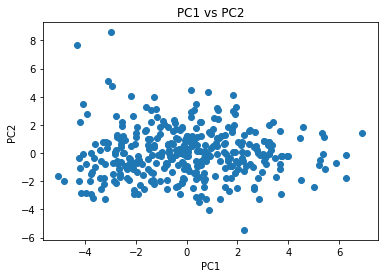

In [0]:
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.title("PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [0]:
# Define scree plot function (copied from Ryan Allred)
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [0]:
pca = PCA(6)
pca_features = pca.fit_transform(Z)

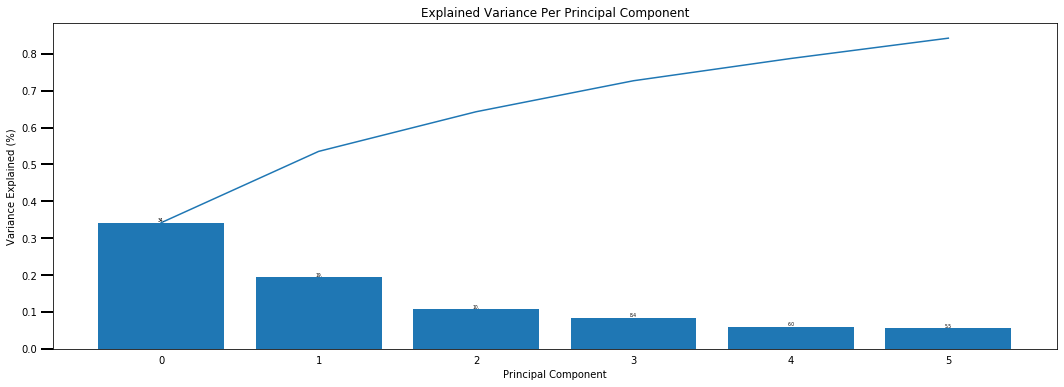

In [0]:
scree_plot(pca)

In [0]:
print(pca.explained_variance_ratio_)

[0.34211523 0.19344376 0.10754219 0.08412453 0.06041324 0.05508237]


# There is a lot of information here and I'm not fully equipped to address it in the way that I would like. There is very clearly connection betwen my activity levels and my RHR but I need more than I currently have, both in skill and data. I have learned quite a bit, though, and have goals for what I can do in 2020 to address my lack of skills and data collection. 

# Obviously, the amount of calories I burn above my BMR will lead to being more fit which in turn will increase the chances of having a more healthy heart which needs to put in less effort. I intend to explore the connection between sleep and the intensity of my exercising as they relate to RHR. That is, does the amount, duration, or type of sleep matter as well as the amount, duration, and type of exercising?

# As is, I am pleased enough with my findings to share with others and look forward to sharing more in the future. 

In [0]:
'''
These two code blocks are of the original 'final' graphs I wanted to include in
my post. I decided to modify them in order to make the text more readable at a 
quick glance. However, I wanted to keep the original, unchanged code cells
accessible if I decide to use them in the future.
'''

In [9]:
df.iloc[1][9]

2010

(-3, 367)

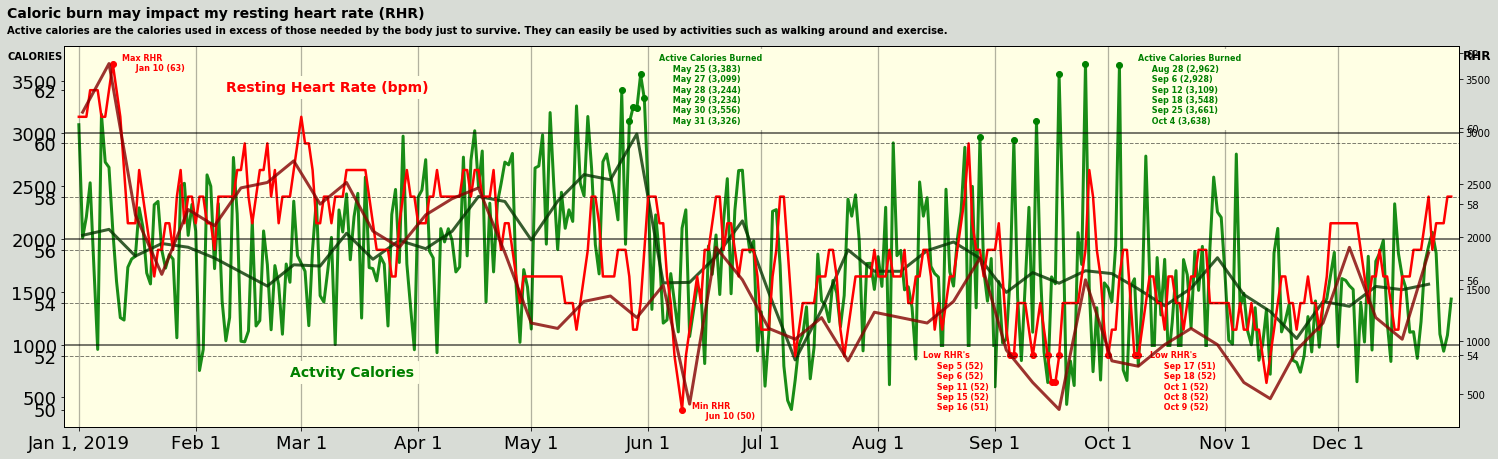

In [23]:
x_range_2 = range(2,365,7)
xticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

fig = plt.figure(figsize=(25,7), facecolor='#d8dcd6')

ax1 = fig.add_subplot()
ax1.plot(x_range, df['Activity Calories'], 'g-', linewidth=3, alpha=.9)

cal_mean = []
hr_mean = []
for i in range(1,len(df['Activity Calories'])-1,7):
  cal_mean.append((df.iloc[i-3][9]+df.iloc[i-2][9]+df.iloc[i-1][9]+df.iloc[i][9]+df.iloc[i+1][9]+df.iloc[i+2][9]+df.iloc[i+3][9])/7)
  hr_mean.append((df.iloc[i-3][10]+df.iloc[i-2][10]+df.iloc[i-1][10]+df.iloc[i][10]+df.iloc[i+1][10]+df.iloc[i+2][10]+df.iloc[i+3][10])/7)

ax3 = ax1.twinx()
ax3.plot(x_range_2, cal_mean, color='#033500', linewidth=3, alpha=.8)



ax1.text(x=40, y=3400, s='Resting Heart Rate (bpm)', 
         color='r', weight='bold', fontsize=14, backgroundcolor='#ffffe4')
ax1.text(x=57, y=700, s='Actvity Calories', 
         color='g', weight='bold', fontsize=14, backgroundcolor='#ffffe4')
ax1.text(x=12.5, y=3600, s='Max RHR \n     Jan 10 (63)', 
         color='r', weight='bold', fontsize=8, backgroundcolor='#ffffe4')
ax1.text(x=163.5, y=300, s='Min RHR \n     Jun 10 (50)', 
         color='r', weight='bold', fontsize=8, backgroundcolor='#ffffe4')
ax1.text(x=155, y=3100, 
         s='Active Calories Burned\n     May 25 (3,383)\n     May 27 (3,099)\n     May 28 (3,244)\n     May 29 (3,234)\n     May 30 (3,556)\n     May 31 (3,326)', 
         color='g', weight='bold', fontsize=8, backgroundcolor='#ffffe4')
ax1.text(x=282, y=3100, 
         s='Active Calories Burned\n     Aug 28 (2,962)\n     Sep 6 (2,928)\n     Sep 12 (3,109)\n     Sep 18 (3,548)\n     Sep 25 (3,661)\n     Oct 4 (3,638)', 
         color='g', weight='bold', fontsize=8, backgroundcolor='#ffffe4')


ax1.text(x=-18, y=4100, s='Caloric burn may impact my resting heart rate (RHR)',
         weight='bold', fontsize=14)
ax1.text(x=-18, y=3950, s='Active calories are the calories used in excess of those needed by the body just to survive. They can easily be used by activities such as walking around and exercise.',
         weight='bold', fontsize=10)
ax1.text(x=-18, y=3700, s='CALORIES', weight='bold', fontsize=10)
ax1.text(x=368, y=3700, s='RHR', weight='bold', fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=18) 
ax1.set_facecolor('#ffffe4')

ax1.axhline(y=1000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=2000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=3000, color='black', linewidth=1.5, alpha=.7)

plt.xticks(xticks,
           ["Jan 1, 2019", "Feb 1", "Mar 1", "Apr 1", "May 1", "Jun 1",
            "Jul 1", "Aug 1", "Sep 1", "Oct 1", "Nov 1", "Dec 1"])

plt.plot(10, 3650, 'ro')
plt.plot(161, 350, 'ro')
plt.plot(248, 870, 'ro')
plt.plot(249, 870, 'ro')
plt.plot(254, 870, 'ro')
plt.plot(258, 870, 'ro')
plt.plot(259, 610, 'ro')
plt.plot(260, 610, 'ro')
plt.plot(261, 870, 'ro')
plt.plot(274, 870, 'ro')
plt.plot(281, 870, 'ro')
plt.plot(282, 870, 'ro')

plt.plot(145, 3400, 'go')
plt.plot(147, 3100, 'go')
plt.plot(148, 3240, 'go')
plt.plot(149, 3230, 'go')
plt.plot(150, 3550, 'go')
plt.plot(151, 3325, 'go')
plt.plot(240, 2950, 'go')
plt.plot(249, 2925, 'go')
plt.plot(255, 3100, 'go')
plt.plot(261, 3550, 'go')
plt.plot(268, 3650, 'go')
plt.plot(277, 3640, 'go')

for value in xticks:
  ax1.axvline(x=value, color='black', linewidth=1.3, alpha=.3)


ax2 = ax1.twinx()
ax2.plot(x_range, df['Resting Heart Rate'], 'r-', linewidth=2.5)
ax2.tick_params(axis='y', labelsize=18)

ax2.axhline(y=52, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=54, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=56, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=58, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=60, color='black', linewidth=1, linestyle='--', alpha=.5)

ax2.text(x=225, y=50, 
         s='Low RHR\'s\n     Sep 5 (52)\n     Sep 6 (52)\n     Sep 11 (52)\n     Sep 15 (52)\n     Sep 16 (51)', 
         color='r', weight='bold', fontsize=8, backgroundcolor='#ffffe4')
ax2.text(x=285, y=50, 
         s='Low RHR\'s\n     Sep 17 (51)\n     Sep 18 (52)\n     Oct 1 (52)\n     Oct 8 (52)\n     Oct 9 (52)', 
         color='r', weight='bold', fontsize=8, backgroundcolor='#ffffe4')

ax4 = ax2.twinx()
ax4.plot(x_range_2, hr_mean, color='#840000', linewidth=3, alpha=.8)

plt.xlim(-3, 367)

(-3, 367)

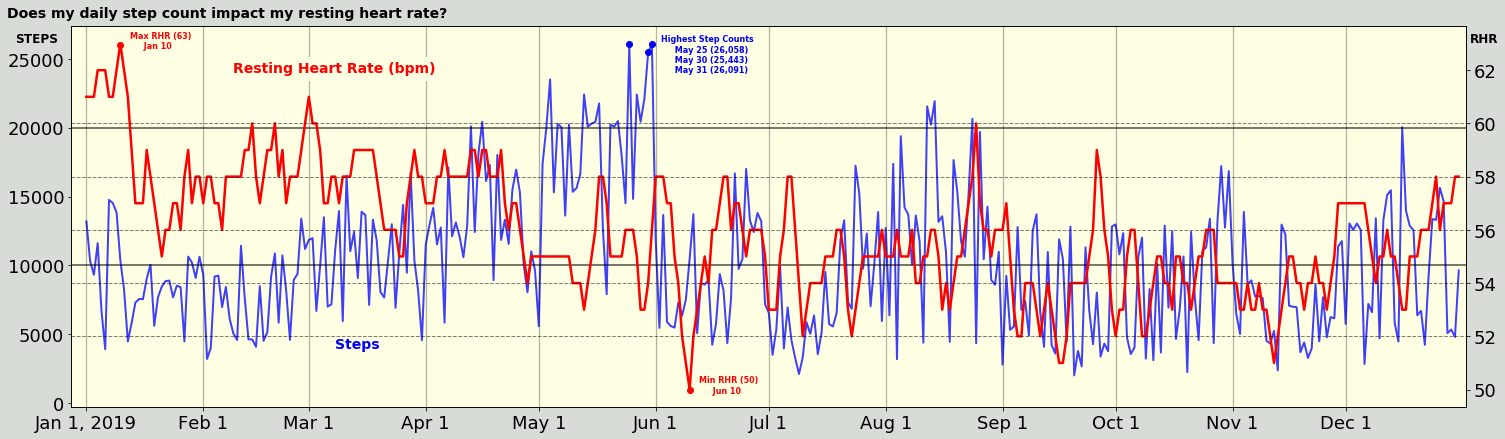

In [6]:
x_range = range(1,366)
xticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

fig = plt.figure(figsize=(25,7), facecolor='#d8dcd6')

ax1 = fig.add_subplot()
ax1.plot(x_range, df['Steps'], 'b-', linewidth=2, alpha=.75)


ax1.text(x=40, y=24000, s='Resting Heart Rate (bpm)', 
         color='r', weight='bold', fontsize=14, backgroundcolor='#ffffe4')
ax1.text(x=67, y=4000, s='Steps', 
         color='b', weight='bold', fontsize=14, backgroundcolor='#ffffe4')
ax1.text(x=12.5, y=25750, s='Max RHR (63)\n     Jan 10', 
         color='r', weight='bold', fontsize=8, backgroundcolor='#ffffe4')
ax1.text(x=163.5, y=750, s='Min RHR (50)\n     Jun 10', 
         color='r', weight='bold', fontsize=8, backgroundcolor='#ffffe4')
ax1.text(x=153.5, y=24000, 
         s='Highest Step Counts\n     May 25 (26,058)\n     May 30 (25,443)\n     May 31 (26,091)', 
         color='b', weight='bold', fontsize=8, backgroundcolor='#ffffe4')

ax1.text(x=-20, y=28000, s='Does my daily step count impact my resting heart rate?',
         weight='bold', fontsize=14)
ax1.text(x=-18, y=26200, s='STEPS', weight='bold', fontsize=12)
ax1.text(x=368, y=26200, s='RHR', weight='bold', fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=18) 
ax1.set_facecolor('#ffffe4')

ax1.axhline(y=10000, color='black', linewidth=1.5, alpha=.7)
ax1.axhline(y=20000, color='black', linewidth=1.5, alpha=.7)

plt.xticks(xticks,
           ["Jan 1, 2019", "Feb 1", "Mar 1", "Apr 1", "May 1", "Jun 1",
            "Jul 1", "Aug 1", "Sep 1", "Oct 1", "Nov 1", "Dec 1"])

plt.plot(10, 26000, 'ro')
plt.plot(161, 1000, 'ro')
plt.plot(151, 26100, 'bo')
plt.plot(145, 26050, 'bo')
plt.plot(150, 25500, 'bo')

for value in xticks:
  ax1.axvline(x=value, color='black', linewidth=1.3, alpha=.3)


ax2 = ax1.twinx()
ax2.plot(x_range, df['Resting Heart Rate'], 'r-', linewidth=2.5)
ax2.tick_params(axis='y', labelsize=18)

ax2.axhline(y=52, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=54, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=56, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=58, color='black', linewidth=1, linestyle='--', alpha=.5)
ax2.axhline(y=60, color='black', linewidth=1, linestyle='--', alpha=.5)

plt.xlim(-3, 367)

52


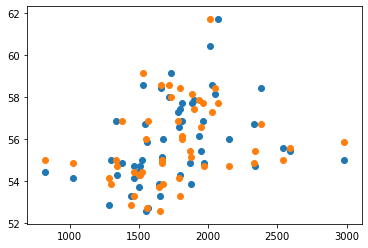

In [28]:
print(len(cal_mean))
plt.scatter(cal_mean, hr_mean)
plt.scatter(cal_mean[0:50], hr_mean[1:51])

In [29]:
np.corrcoef(cal_mean, hr_mean)

array([[1.        , 0.33528571],
       [0.33528571, 1.        ]])

In [30]:
np.corrcoef(cal_mean[0:50], hr_mean[1:51])

array([[1.        , 0.25994923],
       [0.25994923, 1.        ]])

In [0]:
cal_mean_7 = []
hr_mean_7 = []
for i in range(1,len(df['Activity Calories'])-1,7):
  cal_mean_7.append((df.iloc[i-3][9]+df.iloc[i-2][9]+df.iloc[i-1][9]+df.iloc[i][9]+df.iloc[i+1][9]+df.iloc[i+2][9]+df.iloc[i+3][9])/7)
  hr_mean_7.append((df.iloc[i-3][10]+df.iloc[i-2][10]+df.iloc[i-1][10]+df.iloc[i][10]+df.iloc[i+1][10]+df.iloc[i+2][10]+df.iloc[i+3][10])/7)

In [0]:
cal_mean_3 = []
hr_mean_3 = []
for i in range(1,len(df['Activity Calories'])-1,3):
  cal_mean_3.append((df.iloc[i-1][9]+df.iloc[i][9]+df.iloc[i+1][9])/3)
  hr_mean_3.append((df.iloc[i-1][10]+df.iloc[i][10]+df.iloc[i+1][10])/3)

In [0]:
cal_mean_3

In [37]:
np.corrcoef(cal_mean_3, hr_mean_3)

array([[1.       , 0.2511055],
       [0.2511055, 1.       ]])